Accuracy: 0.7030692179273148
Classification Report:
              precision    recall  f1-score   support

           1       0.70      1.00      0.83     27424
           2       0.27      0.00      0.00     11511

    accuracy                           0.70     38935
   macro avg       0.49      0.50      0.42     38935
weighted avg       0.58      0.70      0.58     38935

Features used for training: ['Latitude' 'Longitude' 'WEATHER' 'ROADCOND' 'LIGHTCOND']
Predicted Severity for test input 1: 1
Predicted Severity for test input 2: 2


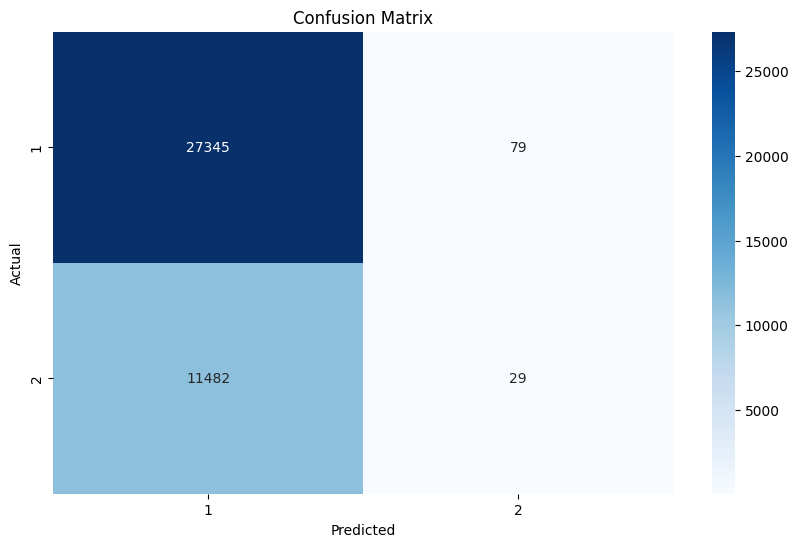

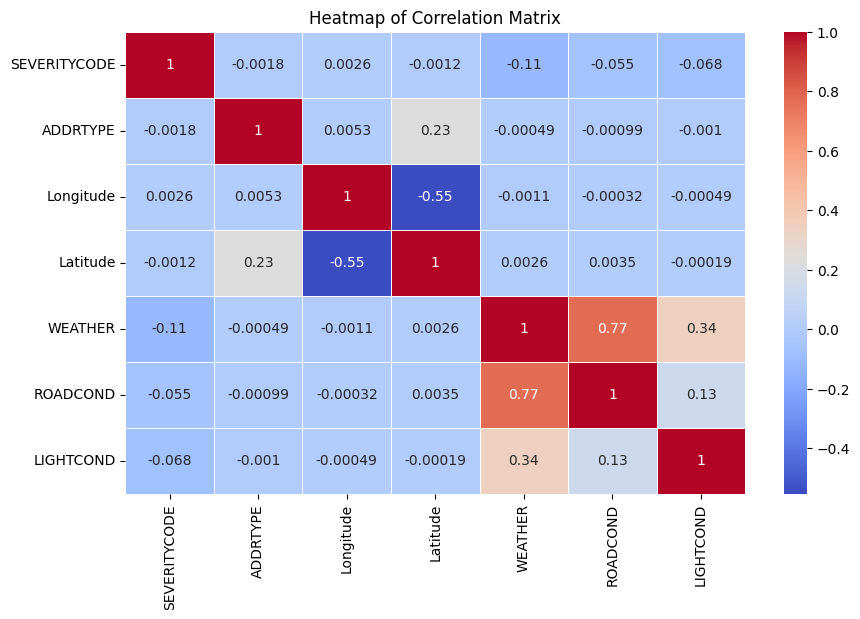

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt  # Added plt for plotting
import seaborn as sns  
import numpy as np


# Load the data
df = pd.read_csv('data/final_converted_data.csv')

# Define features (X) and target (y)
X = df[['Latitude', 'Longitude', 'WEATHER', 'ROADCOND', 'LIGHTCOND' ]]
y = df["SEVERITYCODE"]

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')

# Save the model
joblib.dump(rf_model, 'accident_severity_model.pkl')

# Load the trained model
rf_model = joblib.load('accident_severity_model.pkl')

# Verify the features used for training
print("Features used for training:", rf_model.feature_names_in_)

# Example input that should return severity 1
test_input_severity_1 = pd.DataFrame([[12.9698, 77.7499, 1, 0, 5]], columns=rf_model.feature_names_in_)
prediction_1 = rf_model.predict(test_input_severity_1)
print("Predicted Severity for test input 1:", prediction_1[0])

# Example input that should return severity 2
test_input_severity_2 = pd.DataFrame([[47.6205, -122.3493, 4, 0, 2]], columns=rf_model.feature_names_in_)
prediction_2 = rf_model.predict(test_input_severity_2)
print("Predicted Severity for test input 2:", prediction_2[0])

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Define the training data for the decision tree model
X_train = [[47.6097, -122.3331, 1, 0, 5],
           [47.6205, -122.3493, 4, 0, 2]]
y_train = [1, 2]

# Create the decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Verify the features used for training
feature_names = ['longitude', 'latitude', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
print("Features used for training:", feature_names)

# Example input that should return severity 1
test_input_severity_1 = pd.DataFrame([[47.6097, -122.3331, 1, 0, 5]], columns=feature_names)
prediction_1 = dt_model.predict(test_input_severity_1)
print("Predicted Severity for test input 1:", prediction_1[0])

# Example input that should return severity 2
test_input_severity_2 = pd.DataFrame([[47.6205, -122.3493, 4, 0, 2]], columns=feature_names)
prediction_2 = dt_model.predict(test_input_severity_2)
print("Predicted Severity for test input 2:", prediction_2[0])

Features used for training: ['longitude', 'latitude', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
Predicted Severity for test input 1: 1
Predicted Severity for test input 2: 2


In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

# Define the training data for the decision tree model
X_train = [[47.6097, -122.3331, 1, 0, 5],
           [47.6205, -122.3493, 4, 0, 2]]
y_train = [1, 2]

# Create the decision tree classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Verify the features used for training
feature_names = ['longitude', 'latitude', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
print("Features used for training:", feature_names)

# Save the trained model to a file named 'accident_severity_model.pkl'
joblib.dump(dt_model, 'accident_severity_model.pkl')
print("Decision Tree model saved as 'accident_severity_model.pkl'.")

# Load the trained model from the file
loaded_model = joblib.load('accident_severity_model.pkl')

# Example input that should return severity 1
test_input_severity_1 = pd.DataFrame([[47.6097, -122.3331, 1, 0, 5]], columns=feature_names)
prediction_1 = loaded_model.predict(test_input_severity_1)
print("Predicted Severity for test input 1:", prediction_1[0])

# Example input that should return severity 2
test_input_severity_2 = pd.DataFrame([[47.6205, -122.3493, 4, 0, 2]], columns=feature_names)
prediction_2 = loaded_model.predict(test_input_severity_2)
print("Predicted Severity for test input 2:", prediction_2[0])

Features used for training: ['longitude', 'latitude', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
Decision Tree model saved as 'accident_severity_model.pkl'.
Predicted Severity for test input 1: 1
Predicted Severity for test input 2: 2
